# Algoritmo de Clusterização:<br>Segmentação de clientes de Shopping
<hr>

## Importando Pacotes

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as sch

## Carregando Dados

In [6]:
dataset = pd.read_csv('../data/02_mall_customers.csv', sep=',')

In [7]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
print(f'Quantidade de Linhas: {dataset.shape[0]}\nQuantidade de Colunas: {dataset.shape[1]}')

Quantidade de Linhas: 200
Quantidade de Colunas: 5


In [12]:
x = dataset.iloc[:, [3,4]].values

## Dendograma: Representação esquemática ou diagrama

In [ ]:
# Usando o dendrograma para encontrar o número ideal de clusters.
# Utilizando a biblioteca scipy, que contem ferramentas para agrupamento hierárquico

# Use o dendograma para visualizar como os agrupamentos são formados em cada passado
# e para avaliar os níveis de similiaridade( ou distância ) dos agrupamentos formados

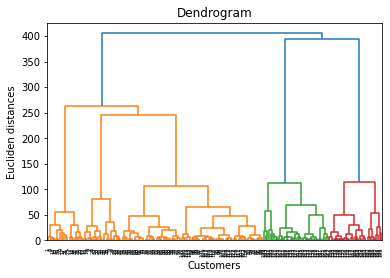

In [14]:
# Criar uma variável dendrograma
# linkage é o prórprio algoritmo de agrupamento hierárquico , então
# linkage temos que especificar em quais dados aplicados e engajamos. Conjunto X

# Ward Linkage determina a distância entre os clusters usando o método de análise de variância

dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eucliden distances')
plt.show()

In [ ]:
# Como descobrir o melhor número de clusters com base nesse diagrama?
# Precisamos encontrar a maior distância vertical possível sem cruzar nenhuma linha horizontal
# que é a linha com moldura verde no diagrama.
# Vamos contar as linhas no diagrama e descobrir quantos clusters são melhores
# total = 5 linhas

## Ajustando o clustering hierárquico ao conjunto de dados

In [18]:
# Existem dois algoritmos para clustering hierárquico:
# Aglomerativo e Divisivo. Escolhemos a distância euclidiana e o método ward para nossa
# classe de algoritmo

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity='euclidean', linkage='ward')

# Ajustar o algoritmo de agrupamento hierárquico ao conjunto de dados x ao criar
# o vetor clusters que informa para cada cliente a qual cluster ele pertence
y_hc = hc.fit_predict(x)

In [19]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

## Visualizando os Clusters

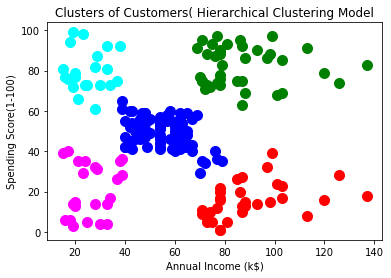

In [20]:
# Código semelhante ao de visualização do KMeans
# Nós apenas substituímos o nome do vetor y_kmeans por y_hc para o agrupamento hierárquico

plt.scatter(x[y_hc==0, 0], x[y_hc==0,1], s=100, c='red',label='Cluster 1')
plt.scatter(x[y_hc==1, 0], x[y_hc==1,1], s=100, c='blue',label='Cluster 2')
plt.scatter(x[y_hc==2, 0], x[y_hc==2,1], s=100, c='green',label='Cluster 3')
plt.scatter(x[y_hc==3, 0], x[y_hc==3,1], s=100, c='cyan',label='Cluster 4')
plt.scatter(x[y_hc==4, 0], x[y_hc==4,1], s=100, c='magenta',label='Cluster 5')
plt.title('Clusters of Customers( Hierarchical Clustering Model')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

## Salvando os Dados

In [27]:
dataset['Clusters'] = y_hc
dataset.to_csv('../output/02_mall_customers_Model.csv', sep=';', index=False)

In [28]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0
